# **Homework 1**

**Equipe**:

**Kelvin Leandro Martins - 540006**

**Pedro Leinos Falcão Cunha - 542114**

In [1]:
import sympy as sp
from sympy import laplace_transform, inverse_laplace_transform, symbols, \
latex, Function, Heaviside
from sympy.abc import s, t
from scipy import signal
import matplotlib.pyplot as plt
import numpy as np
from IPython.display import display, Math

## Exercise 1

Find the inverse Laplace transform

### 1.1

In [2]:
F1 = (3*s**2 + 5*s) / (s**3 + 6*s**2 + 11*s + 6)
f1 = inverse_laplace_transform(F1, s, t)

display(Math('F_1(s) = ' + latex(F1)))
print()
display(Math('f_1(t) = ' + latex(sp.simplify(f1))))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

### 1.2

In [3]:
F2 = (s**2 + 2*s + 1) / (s+2)**3
F2_partial = sp.apart(F2)
f2 = inverse_laplace_transform(F2_partial, s, t)

display(Math('F_2(s) = ' + latex(F2)))
print()
display(Math('f_2(t) = ' + latex(sp.simplify(f2))))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

### 1.3

In [ ]:
F3 = (2*s + 3) / (s**3 + 6*s**2 + 21*s + 26)
f3 = inverse_laplace_transform(F3, s, t)

display(Math('F_3(s) = ' + latex(F3)))
print()
display(Math('f_3(t) = ' + latex(sp.simplify(f3))))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

### 1.4

In [ ]:
F4 = (1 + 2*sp.exp(-s)) / (s**2 + 3*s + 2)
f4 = inverse_laplace_transform(F4, s, t)

display(Math('F_4(s) = ' + latex(F4)))
print()
display(Math('f_4(t) = ' + latex(sp.expand(f4))))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

## Exercise 2

In order to study the effect of zeros in response of a
system, consider the transfer function given in equation

$G(s) = \frac{\alpha s + 1}{2s^2 + 3s + 1}$

### 2.1

For $\alpha = 1$, find and plot the unit step and impulse responses

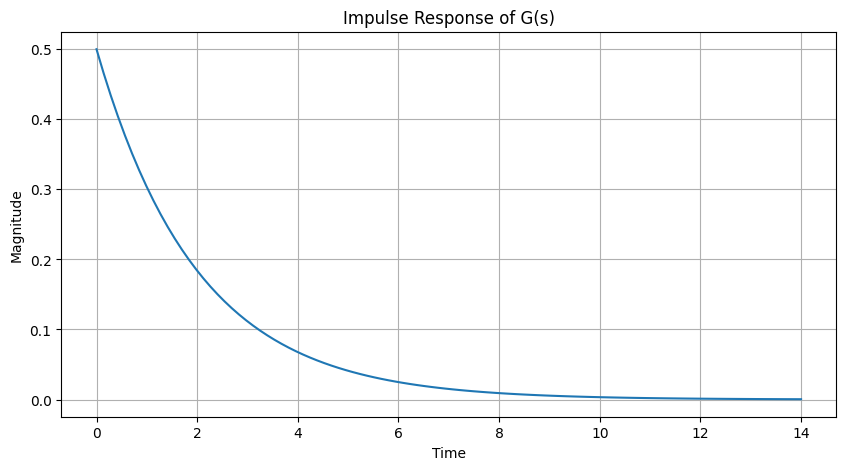

In [ ]:
num = np.array([1., 1.]) # Numerator coefficients
den = np.array([2., 3., 1.]) # Denominator coefficients
G = signal.TransferFunction(num, den)

# Generate impulse response
t_imp, imp_response = signal.impulse(G)

plt.figure(figsize=(10,5))
plt.plot(t_imp, imp_response)
plt.title('Impulse Response of G(s)')
plt.xlabel('Time')
plt.ylabel('Magnitude')
plt.grid(True)

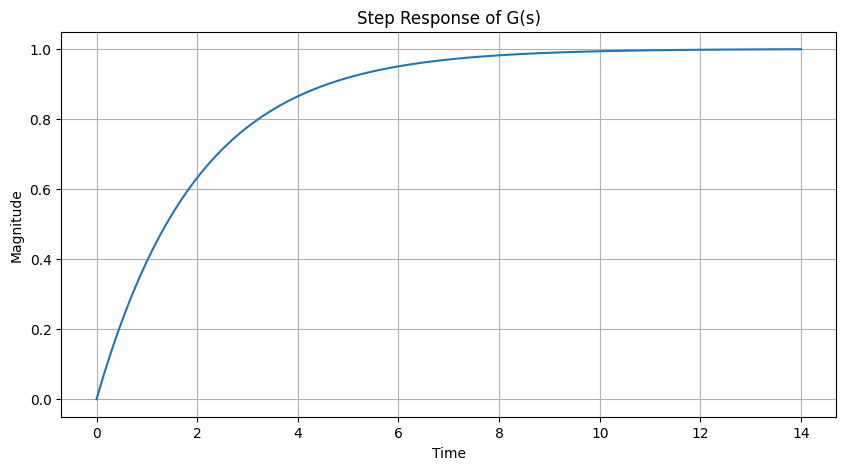

In [ ]:
# Generate step respose
t_step, step_response = signal.step(G)

plt.figure(figsize=(10,5))
plt.plot(t_step, step_response)
plt.title('Step Response of G(s)')
plt.xlabel('Time')
plt.ylabel('Magnitude')
plt.grid(True)

### 2.2

For $\alpha = [−1, 0, 5 , 7]$, plot and compare the unit step response

/usr/local/lib/python3.10/dist-packages/scipy/signal/_filter_design.py:1746: BadCoefficients: Badly conditioned filter coefficients (numerator): the results may be meaningless
  warnings.warn("Badly conditioned filter coefficients (numerator): the "


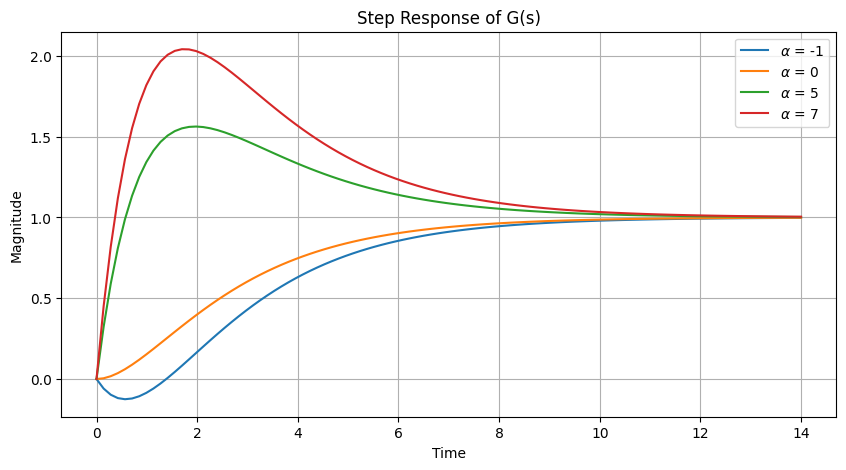

In [ ]:
plt.figure(figsize=(10,5))
alphas = [-1, 0, 5, 7]
for alpha in alphas:
  num = [alpha, 1]
  den = [2, 3, 1]
  G = signal.TransferFunction(num, den)
  # Computing the step response of the current G(s)
  t_step, step_response = signal.step(G)
  plt.plot(t_step, step_response, label=fr'$\alpha$ = {alpha}')

plt.title('Step Response of G(s)')
plt.xlabel('Time')
plt.ylabel('Magnitude')
plt.grid(True)
plt.legend()
plt.show()

### 2.3

Discuss how the system varies its response for the different values of $\alpha$.

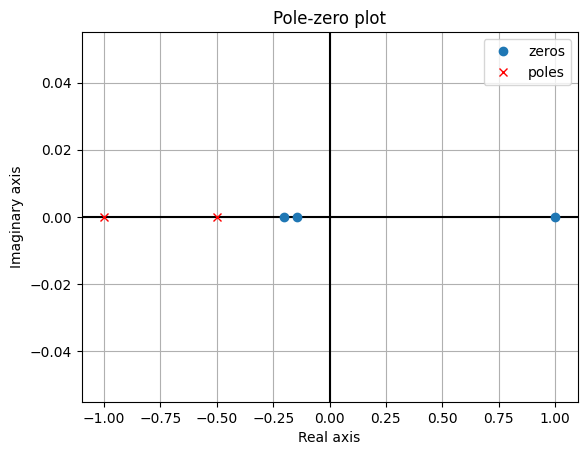

In [ ]:
zeros = [-1/alpha for alpha in alphas if alpha !=0]
plt.axvline(x=0, c='k') # y-axis
plt.axhline(y=0, c='k') # x-axis
plt.plot(zeros, [0]*len(zeros), 'o', label='zeros')
plt.plot([-1, -0.5], [0, 0], 'rx', label='poles')
plt.title('Pole-zero plot')
plt.xlabel('Real axis')
plt.ylabel('Imaginary axis')
plt.legend()
plt.grid()
plt.show()

## Exercise 3

Consider the input-output model in equation

$\frac{d^2y(t)}{dt^2} + 2 \frac{dy(t)}{dt} + y(t) = 4 \frac{d^2u(t)}{dt^2} + 15 \frac{du(t)}{dt} + 19u(t)$

### 3.1

Define the characteristic polynomial and plot the system modes

$\frac{d^2y(t)}{dt^2} + 2 \frac{dy(t)}{dt} + y(t) = 4 \frac{d^2u(t)}{dt^2} + 15 \frac{du(t)}{dt} + 19u(t)$

Solving the characteristic equation:

$\frac{d^2y(t)}{dt^2} + 2 \frac{dy(t)}{dt} + y(t) = 0$

$\lambda^2 + 2\lambda + 1 = 0 \rightarrow \lambda = -1$

$y(t) = c_1e^{-t} + c_2te^{-t}$

Characteristic modes of the system are $e^{-t}$ and $te^{-t}$

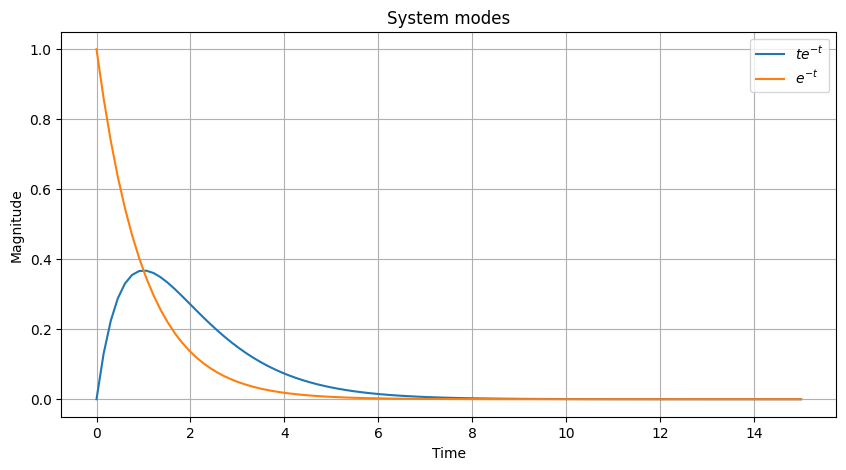

In [ ]:
time = np.linspace(0,15,100)
exp_1 = time*np.exp(-time)
exp_2 = np.exp(-time)

plt.figure(figsize=(10,5))
plt.plot(time, exp_1, label=r'$te^{-t}$')
plt.plot(time, exp_2, label=r'$e^{-t}$')
plt.title('System modes')
plt.xlabel('Time')
plt.ylabel('Magnitude')
plt.legend()
plt.grid()
plt.show()

### 3.2

Given the initial conditions in equation, find the free evolution of the system in equation:

$y(t)\bigg|_{t=0} = 1, \quad \frac{dy(t)}{dt}\bigg|_{t=0} = 1$

In [ ]:
Y = sp.Function('Y')(s)
U = sp.Function('U')(s)

# Constants in the differential equation
a2, a1, a0, b2, b1, b0 = 1, 2, 1, 4, 15, 19

# Symbols for initial conditions
y0, dy0 = symbols('y_0 \dot{y}_0')

# Equation representing the differential equation in the Laplace domain
equation = sp.Eq(a2*(s**2*Y - s*y0 - dy0) + a1*(s*Y - y0) + a0*Y,
                 U *(b2*s**2 + b1*s + b0))

# Solving the Laplace domain equation for Y(s)
Y_s = sp.solve(equation,Y)[0]

display(equation)
print()
display(Math('Y(s) = ' + latex(Y_s)))

# Replacing heaviside, bcuz sympy.Heaviside(0) = 0.5 by default
real_heaviside = {Heaviside(t): Heaviside(t,1)}

Eq(-\dot{y}_0 + s**2*Y(s) - s*y_0 + 2*s*Y(s) - 2*y_0 + Y(s), (4*s**2 + 15*s + 19)*U(s))

<IPython.core.display.Math object>

In [ ]:
# Substitute initial conditions and U = 0 for the free response
Y_s_free = Y_s.subs({y0: 1, dy0: 1, U: 0})
y_t_free = inverse_laplace_transform(Y_s_free, s, t)
display(Math('Y(s)_{free} = ' + latex(Y_s_free)))
print()
display(Math('y(t)_{free} = ' + latex(y_t_free)))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

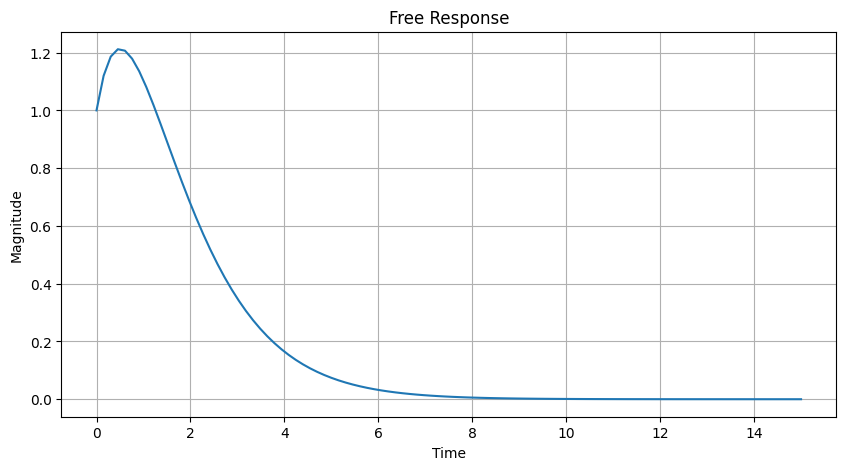

In [ ]:
time = np.linspace(0, 15, 100)
y_t_values = [y_t_free.subs({**real_heaviside, t: value}) for value in time]

plt.figure(figsize=(10,5))
plt.plot(time, y_t_values)
plt.title('Free Response')
plt.xlabel('Time')
plt.ylabel('Magnitude')
plt.grid(True)
plt.show()

### 3.3

Find the forced response of the system subject to a unit step input

In [ ]:
# Substitute U = step input and initial conditions to zero for forced response
Y_s_forced = Y_s.subs({U: 1/s, y0: 0, dy0: 0})
y_t_forced = inverse_laplace_transform(Y_s_forced, s, t)
display(Math('Y(s)_{forced} = ' + latex(Y_s_forced)))
print()
display(Math('y(t)_{forced} = ' + latex(y_t_forced)))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

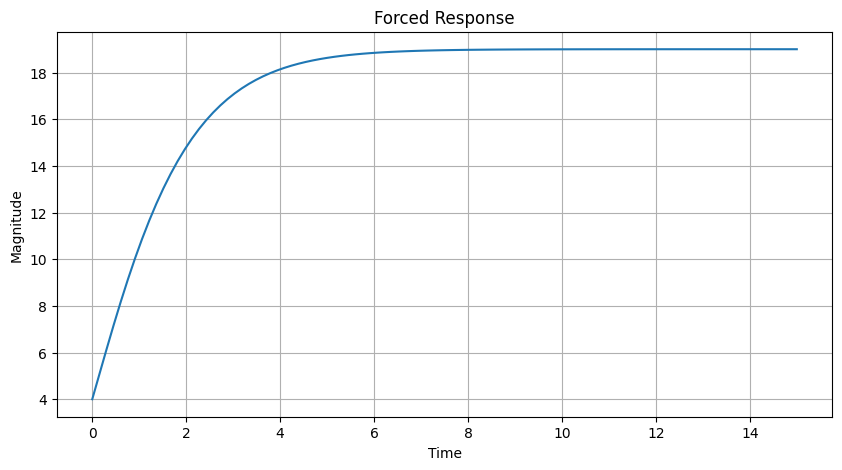

In [ ]:
time = np.linspace(0, 15, 100)
y_t_values = [y_t_forced.subs({**real_heaviside, t: value}) for value in time]

plt.figure(figsize=(10,5))
plt.plot(time, y_t_values)
plt.title('Forced Response')
plt.xlabel('Time')
plt.ylabel('Magnitude')
plt.grid(True)
plt.show()

### 3.4

Plot the response y(t)

In [ ]:
# Substitute the initial conditions and input in Y(s)
Y_s_final = Y_s.subs({U: 1/s, y0: 1, dy0: 1})
y_t_final = inverse_laplace_transform(Y_s_final, s, t)
display(Math('Y(s) = ' + latex(Y_s_final)))
print()
display(Math('y(t) = ' + latex(y_t_final)))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

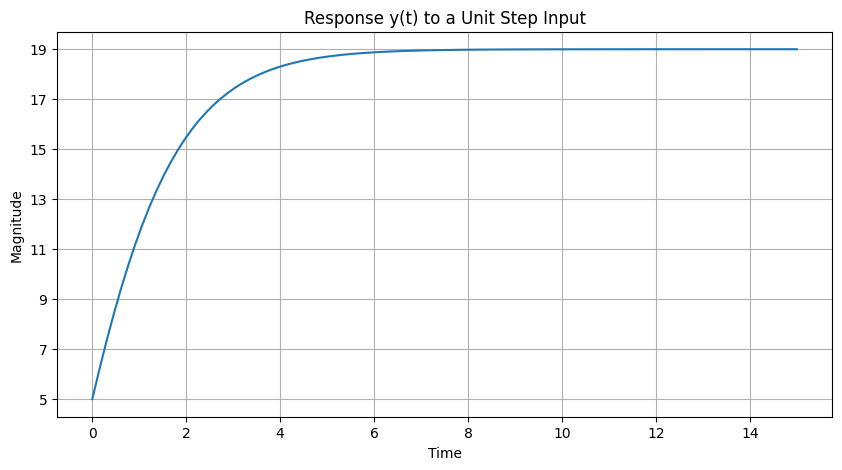

In [ ]:
time = np.linspace(0, 15, 100)
y_t_values = [y_t_final.subs({**real_heaviside, t: value}) for value in time]

plt.figure(figsize=(10,5))
plt.plot(time, y_t_values)
plt.title('Response y(t) to a Unit Step Input')
plt.xlabel('Time')
plt.ylabel('Magnitude')
plt.yticks([i for i in range(5,20,2)])
plt.grid(True)
plt.show()

## Exercise 4

\begin{cases}
    \begin{bmatrix}
    \dot{x}_1(t) \\
    \dot{x}_2(t)
    \end{bmatrix} &=
    \begin{bmatrix}
    0 & 1 \\
    -5 & -2
    \end{bmatrix}
    \begin{bmatrix}
    x_1(t) \\
    x_2(t)
    \end{bmatrix} +
    \begin{bmatrix}
    0 \\
    2
    \end{bmatrix}
    u(t) \\
    \\
    y(t) &=
    \begin{bmatrix} 0 & 1 \end{bmatrix}
    \begin{bmatrix}
    x_1(t) \\
    x_2(t)
    \end{bmatrix}
    + u(t)
\end{cases}

### 4.1

Find the corresponding transfer function

In [4]:
A = np.array([[0, 1], [-5, -2]])
B = np.array([[0], [2]])
C = np.array([[0, 1]])
D = np.array([[1]])

# Convert state-space representation to transfer function
num, den = signal.ss2tf(A, B, C, D)
G = signal.TransferFunction(num, den)
G_s = (num[0,0]*s**2 + num[0,1]*s + num[0,2]) / (den[0]*s**2 +
                                                          den[1]*s + den[2])

print(G)
print()
display(Math('G(s) = ' + latex(G_s)))

TransferFunctionContinuous(
array([1., 4., 5.]),
array([1., 2., 5.]),
dt: None
)



<IPython.core.display.Math object>

### 4.2

Find an input-output model equivalent to the state-space model

In [5]:
u = sp.Function('u')(t)
y = sp.Function('y')(t)
diff_equation = sp.Eq(den[0]*sp.diff(y, t, t) + den[1]*sp.diff(y, t) + den[2]*y,
                num[0,0]*sp.diff(u,t,t) + num[0,1]*sp.diff(u,t) + num[0,2]*u)
diff_equation

Eq(5.0*y(t) + 2.0*Derivative(y(t), t) + 1.0*Derivative(y(t), (t, 2)), 5.0*u(t) + 4.0*Derivative(u(t), t) + 1.0*Derivative(u(t), (t, 2)))

### 4.3

Find the state and output forced evolution as response of the input $u(t) = e^{-3t}\theta(t)$.

In [6]:
U_s = 1 / (s+3)
Y_s = G_s * U_s
y_t = inverse_laplace_transform(Y_s, s, t)
display(Math('Y(s) = ' + latex(Y_s)))
print()
display(Math('y(t) = ' + latex(sp.simplify(y_t))))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [41]:
A_s = sp.Matrix(A)
B_s = sp.Matrix(B)
I = sp.eye(A.shape[0]) # Identity matrix
alpha = (s * I - A_s).inv() * B
X_s_array = alpha * U_s

# Converting states variables from Laplace to time domain
X1_s = X_s_array[0]
X2_s = X_s_array[1]
x1_t = inverse_laplace_transform(X1_s, s, t)
x2_t = inverse_laplace_transform(X2_s, s, t)

display(Math('\mathbf{X}(s) = ' + latex(sp.simplify(X_s_array))))
print()
display(Math('X_1(s) = ' + latex(sp.simplify(X1_s))))
print()
display(Math('X_2(s) = ' + latex(sp.simplify(X2_s))))
print()
display(Math('x_1(t) = ' + latex(sp.simplify(x1_t))))
print()
display(Math('x_2(t) = ' + latex(sp.simplify(x2_t))))
print()

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [ ]:
!pip install control

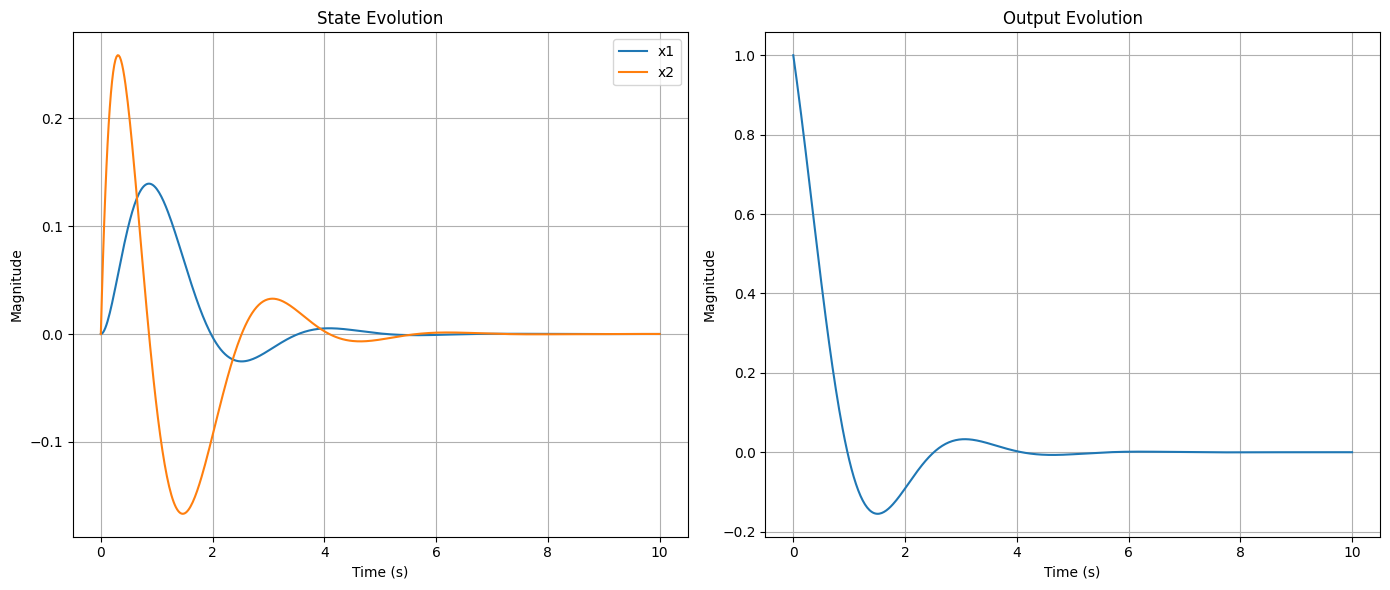

In [ ]:
import control
# Create the state-space model
time = np.linspace(0, 10, 500)
sys = control.ss(A, B, C, D)
u = np.exp(-3 * time) * np.heaviside(time, 1)

# Simulate the response
_, yout, xout = control.forced_response(sys, T=time, U=u, return_x=True)

# Plotting
plt.figure(figsize=(14, 6))

# Plot the state evolution
plt.subplot(1, 2, 1)
plt.plot(time, xout.T)
plt.title('State Evolution')
plt.xlabel('Time (s)')
plt.ylabel('Magnitude')
plt.legend(['x1', 'x2'])
plt.grid()

# Plot the output evolution
plt.subplot(1, 2, 2)
plt.plot(time, yout)
plt.title('Output Evolution')
plt.xlabel('Time (s)')
plt.ylabel('Magnitude')
plt.grid()

plt.tight_layout()
plt.show()